In [1]:
# !pip install torch
!pip install torchvision 

In [2]:
import torch
import torchvision
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

ImportError: cannot import name 'PILLOW_VERSION' from 'PIL' (/opt/anaconda3/lib/python3.11/site-packages/PIL/__init__.py)

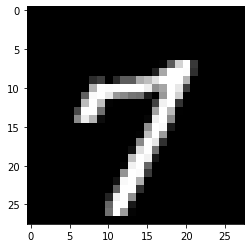

tensor(7)


In [ ]:
import matplotlib.pyplot as plt

dataiter = iter(train_loader)
images, labels = next(dataiter)

plt.imshow(images[6].numpy().squeeze(), cmap='gray')
plt.show()

print(labels[6])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

model = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader, 1): # Added enumeration to get batch number
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Print average loss for the epoch
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/i:.4f}")

Epoch [1/10], Loss: 1.6295
Epoch [2/10], Loss: 1.5407
Epoch [3/10], Loss: 1.5247
Epoch [4/10], Loss: 1.5159
Epoch [5/10], Loss: 1.5115
Epoch [6/10], Loss: 1.5077
Epoch [7/10], Loss: 1.5045
Epoch [8/10], Loss: 1.5023
Epoch [9/10], Loss: 1.5004
Epoch [10/10], Loss: 1.4996


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total}%')

Test Accuracy: 95.58%


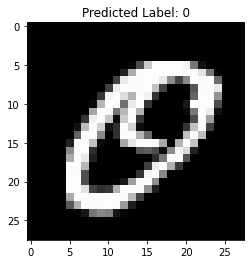

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

outputs = model(images[1:2])
_, predicted = torch.max(outputs.data, 1)

plt.imshow(images[1].numpy().squeeze(), cmap='gray')
plt.title(f"Predicted Label: {predicted.item()}")
plt.show()